# MovieLens Data Exploration

Project Data Description:
MovieLens data sets were collected by the GroupLens Research Project at the University of Minnesota.
Source: https://grouplens.org/datasets/movielens/100k/


### DETAILED DESCRIPTIONS OF DATA FILES
==============================================

Here are brief descriptions of the data.

**u.data** -- The full u data set, 100000 ratings by 943 users on 1682 items.
              Each user has rated at least 20 movies.  Users and items are
              numbered consecutively from 1.  The data is randomly
              ordered. This is a tab separated list of 
	         user id | item id | rating | timestamp. 
              The time stamps are unix seconds since 1/1/1970 UTC

**u.item** -- Information about the items (movies); this is a tab separated
              list of
              movie id | movie title | release date | video release date |
              IMDb URL | unknown | Action | Adventure | Animation |
              Children's | Comedy | Crime | Documentary | Drama | Fantasy |
              Film-Noir | Horror | Musical | Mystery | Romance | Sci-Fi |
              Thriller | War | Western |
              The last 19 fields are the genres, a 1 indicates the movie
              is of that genre, a 0 indicates it is not; movies can be in
              several genres at once.
              The movie ids are the ones used in the u.data data set.

**u.user** -- Demographic information about the users; this is a tab
              separated list of
              user id | age | gender | occupation | zip code
              The user ids are the ones used in the u.data data set.

## Importing all the necessary packages

In [1]:
# Importing all the necessary libraries for data manipulations
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import calendar
import datetime
%matplotlib inline

# Setting all necessary configurations for plotting
#sns.set(style="ticks")
sns.set(style="whitegrid")
mpl.rcParams['axes.titlesize'] = '20'
mpl.rcParams['axes.labelsize'] = '16'
mpl.rcParams['xtick.labelsize'] = '14'
mpl.rcParams['ytick.labelsize'] = '14'

### Define all constants used along with their initializations

In [2]:
#Capture day of week and rename to weekday names
days = {0 : 'Mon', 1 : 'Tue', 2 : 'Wed', 3 : 'Thu', 4 : 'Fri', 5 : 'Sat', 6 : 'Sun'}

## Loading the Ratings Data

In [3]:
# This expects the data to be available in a folder called 'ml-100k' under the current workspace
ratings = pd.read_csv('./ml-100k/u.data', sep = '\t', names= ['UserId', 'MovieId', 'Rating', 'Rating Date'])
ratings.set_index('UserId', inplace=True)

# Checking if the load happened correctly
ratings.head()

,MovieId,Rating,Rating Date
UserId,,,
196,242,3,881250949
186,302,3,891717742
22,377,1,878887116
244,51,2,880606923
166,346,1,886397596


### Investigate the data types in the ratings dataset
This is to ascertain the type of each column and also to see how many columns have null values. It also gives us a sense of how much of data cleansing might possibly be required along with any imputations, labelling, scaling or normalization

In [4]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 196 to 12
Data columns (total 3 columns):
MovieId        100000 non-null int64
Rating         100000 non-null int64
Rating Date    100000 non-null int64
dtypes: int64(3)
memory usage: 3.1 MB


The above data has **no null** values and hence can be used as is. We also understand that the **Rating Date** is in *integer format* and hence need to be converted to *datetime format* inorder to do further analysis

## Rating Date Conversion
The **Rating Date** has to first be converted to a datetime format inorder to be processed further<br>
<br>
Following are carried out for conversion
* The **Rating Date** is first converted to a datetime format
* **Year**, **Month**, **Day**, **Hour** are separated out as separate columns. This helps for granular plots when needed
* **Rating Week Day** and **Rating Month** are evaluated from the numbers for enhancing categorical plots

In [5]:
ratings['Rating Date'] = ratings['Rating Date'].apply(lambda x: datetime.datetime.fromtimestamp(x))

# Generate time breakup based on timestamp for more analytics
ratings['Rating Year'] = pd.to_datetime(ratings['Rating Date']).dt.year
ratings['Rating Month'] = pd.to_datetime(ratings['Rating Date']).dt.month
ratings['Rating Day'] = pd.to_datetime(ratings['Rating Date']).dt.day
ratings['Rating Hour'] = pd.to_datetime(ratings['Rating Date']).dt.hour

#Capture day of week and rename to weekday names
ratings['Rating Week Day'] = pd.to_datetime(ratings['Rating Date']).dt.dayofweek.apply(lambda x: days[x])
ratings['Rating Month'] = ratings['Rating Month'].apply(lambda x: calendar.month_abbr[x])

### Check if the new columns are set properly

In [6]:
ratings.head()

,MovieId,Rating,Rating Date,Rating Year,Rating Month,Rating Day,Rating Hour,Rating Week Day
UserId,,,,,,,,
196,242,3,1997-12-04 19:55:49,1997,Dec,4,19,Thu
186,302,3,1998-04-04 23:22:22,1998,Apr,4,23,Sat
22,377,1,1997-11-07 11:18:36,1997,Nov,7,11,Fri
244,51,2,1997-11-27 09:02:03,1997,Nov,27,9,Thu
166,346,1,1998-02-02 09:33:16,1998,Feb,2,9,Mon


## Loading the User Data

In [7]:
# This expects the data to be available in a folder called 'ml-100k' under the current workspace
users = pd.read_csv('./ml-100k/u.user', sep = '|', names= ['UserId', 'Age', 'Gender', 'Occupation', 'Zip'])
users.set_index('UserId', inplace=True)

# Checking if the load happened correctly
users.head()

,Age,Gender,Occupation,Zip
UserId,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213


### Investigate the data types in the users dataset
This is to ascertain the type of each column and also to see how many columns have null values. It also gives us a sense of how much of data cleansing might possibly be required along with any imputations, labelling, scaling or normalization

In [8]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 943 entries, 1 to 943
Data columns (total 4 columns):
Age           943 non-null int64
Gender        943 non-null object
Occupation    943 non-null object
Zip           943 non-null object
dtypes: int64(1), object(3)
memory usage: 36.8+ KB


The above data has **no null** values and hence can be used as is. We also understand that the **Gender**, **Occupation** and **Zip** are categorical variables

## Loading the Movie Data

In [9]:
# This expects the data to be available in a folder called 'ml-100k' under the current workspace
movies = pd.read_csv('./ml-100k/u.item', sep = '|', names=['MovieId', 'Movie Title', 'Release Date', 'IMDb URL', 'UnKnown', 'Action', 'Adventure', 'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'])
movies.set_index('MovieId', inplace=True)

# Checking if the load happened correctly
movies.head()

,Movie Title,Release Date,IMDb URL,UnKnown,Action,Adventure,Animation,Children's,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
MovieId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0.0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,GoldenEye (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0.0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,Four Rooms (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Get Shorty (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,Copycat (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Copycat%20(1995),0.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


### Investigate the data types in the movies dataset
This is to ascertain the type of each column and also to see how many columns have null values. It also gives us a sense of how much of data cleansing might possibly be required along with any imputations, labelling, scaling or normalization

In [10]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1682 entries, 1 to 1682
Data columns (total 22 columns):
Movie Title     1682 non-null object
Release Date    1681 non-null object
IMDb URL        1679 non-null object
UnKnown         1679 non-null float64
Action          1682 non-null int64
Adventure       1682 non-null int64
Animation       1682 non-null int64
Children's      1682 non-null int64
Comedy          1682 non-null int64
Crime           1682 non-null int64
Documentary     1682 non-null int64
Drama           1682 non-null int64
Fantasy         1682 non-null int64
Film-Noir       1682 non-null int64
Horror          1682 non-null int64
Musical         1682 non-null int64
Mystery         1682 non-null int64
Romance         1682 non-null int64
Sci-Fi          1682 non-null int64
Thriller        1682 non-null int64
War             1682 non-null int64
Western         1682 non-null int64
dtypes: float64(1), int64(18), object(3)
memory usage: 302.2+ KB


The above data has certain **null** values in **Release Date**, **IMDb URL**. It also has a column called **UnKnown** which can be safely removed as we are not sure what the column represents

## Checking the 'Unknown' Column for values
Before removing the **UnKnown** column, we can check what kind of values are contained in it

In [11]:
movies['UnKnown'].unique()

array([ 0., nan,  1.])

There are only 3 types of values as shown above. For further analysis this can be safely ignored.

## Deleting 'Unknown' Column
The **UnKnown** column is dropped to enable plotting

In [12]:
# 'Unknown' column can safely be deleted since it doesn't contain significant values
movies.drop(['UnKnown'], axis=1, inplace=True)

## Checking for null values in dataset

In [13]:
print('Ratings Data - ', np.where(ratings.isnull()))
print('User Data - ', np.where(users.isnull()))
print('Movies Data - ', np.where(movies.isnull()))

Ratings Data -  (array([], dtype=int64), array([], dtype=int64))
User Data -  (array([], dtype=int64), array([], dtype=int64))
Movies Data -  (array([ 266,  266, 1357, 1358]), array([1, 2, 2, 2]))


The above output shows that **Movies** dataset contains 4 values that are null. These null values are on the **IMDb URL** column mostly. Since URL is not important for analysis. We can safely leave it as is. <br><br>
The **Release Date** field is key for conversion. We can either drop it altogether or find the actual **Release Date** from the IMDB database and update it. Let us choose to drop it for now

## Dropping relevant rows & columns without values
Dropping the rows having **Release Date** as null. It is at row **266** from the above output

In [14]:
# row 266 is completely empty and hence is removed
movies.drop(movies.index[266], inplace=True)

# Only data that is null is row 1356 and 1357 with null values in the URL. This is ok
np.where(movies.isnull())

(array([1356, 1357]), array([2, 2]))

## Release Date Conversion
The **Release Date** has to first be converted to a datetime format inorder to be processed further<br>
<br>
Following are carried out for conversion
* The **Release Date** is first converted to a datetime format from the current **%d-%b-%Y** format
* **Year**, **Month**, **Day**, **Hour** are separated out as separate columns. This helps for granular plots when needed
* **Release Week Day** and **Release Month** are evaluated from the numbers for enhancing categorical plots

In [15]:
movies['Release Date'] = movies['Release Date'].apply(lambda x: pd.datetime.strptime(x, '%d-%b-%Y'))
movies['Release Year'] = pd.to_datetime(movies['Release Date']).dt.year
movies['Release Month'] = pd.to_datetime(movies['Release Date']).dt.month
movies['Release Day'] = pd.to_datetime(movies['Release Date']).dt.day

movies['Release Week Day'] = pd.to_datetime(movies['Release Date']).dt.dayofweek.apply(lambda x: days[x])
movies['Release Month'] = movies['Release Month'].apply(lambda x: calendar.month_abbr[x])

### Check if the new columns are set properly

In [16]:
movies.head()

,Movie Title,Release Date,IMDb URL,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Mystery,Romance,Sci-Fi,Thriller,War,Western,Release Year,Release Month,Release Day,Release Week Day
MovieId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),1995-01-01,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,1,1,1,0,0,...,0,0,0,0,0,0,1995,Jan,1,Sun
2,GoldenEye (1995),1995-01-01,http://us.imdb.com/M/title-exact?GoldenEye%20(...,1,1,0,0,0,0,0,...,0,0,0,1,0,0,1995,Jan,1,Sun
3,Four Rooms (1995),1995-01-01,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1995,Jan,1,Sun
4,Get Shorty (1995),1995-01-01,http://us.imdb.com/M/title-exact?Get%20Shorty%...,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1995,Jan,1,Sun
5,Copycat (1995),1995-01-01,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,1,0,...,0,0,0,1,0,0,1995,Jan,1,Sun


### Combine the datasets for data analysis
* **Users** dataframe and **ratings** dataframe have a common column called **UserID**. We use the join function to combine the dataframes
* The resulting dataframe can further be joined with the **movies** dataframe by joining based on **MovieId** 

In [17]:
user_with_ratings = users.join(ratings, on='UserId')
userratings_with_movies = user_with_ratings.join(movies, on='MovieId')
print('Ratings dimensions      - ', ratings.shape)
print('User dimensions         - ', users.shape)
print('Movies dimensions       - ', movies.shape)
print('user_with_ratings       - ', user_with_ratings.shape)
print('userratings_with_movies - ', userratings_with_movies.shape)

Ratings dimensions      -  (100000, 8)
User dimensions         -  (943, 4)
Movies dimensions       -  (1681, 25)
user_with_ratings       -  (100000, 12)
userratings_with_movies -  (100000, 37)


We thus get 2 dataframes **user_with_ratings** and **userratings_with_movies**. The dimensions of these are shown in the output above.

### Ignore any nulls in the 'Movie Title' column and verify

In [18]:
# Remove those row that dont have a 'Movie Title' field
userratings_with_movies = userratings_with_movies[~userratings_with_movies['Movie Title'].isnull()]

# Check how many rows are having null values
userratings_with_movies.isnull().sum()

Age                 0
Gender              0
Occupation          0
Zip                 0
MovieId             0
Rating              0
Rating Date         0
Rating Year         0
Rating Month        0
Rating Day          0
Rating Hour         0
Rating Week Day     0
Movie Title         0
Release Date        0
IMDb URL            4
Action              0
Adventure           0
Animation           0
Children's          0
Comedy              0
Crime               0
Documentary         0
Drama               0
Fantasy             0
Film-Noir           0
Horror              0
Musical             0
Mystery             0
Romance             0
Sci-Fi              0
Thriller            0
War                 0
Western             0
Release Year        0
Release Month       0
Release Day         0
Release Week Day    0
dtype: int64

The above output shows that we only have **IMDb URL** as the only field that contains null values

### Analyze the user_with_ratings dataframe

In [19]:
user_with_ratings.describe()

,Age,MovieId,Rating,Rating Year,Rating Day,Rating Hour
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,32.969850,425.530130,3.529860,1997.473490,15.828240,10.484280
std,11.562623,330.798356,1.125674,0.499299,9.135599,8.103065
min,7.000000,1.000000,1.000000,1997.000000,1.000000,0.000000
25%,24.000000,175.000000,3.000000,1997.000000,8.000000,3.000000
50%,30.000000,322.000000,4.000000,1997.000000,16.000000,8.000000
75%,40.000000,631.000000,4.000000,1998.000000,24.000000,20.000000
max,73.000000,1682.000000,5.000000,1998.000000,31.000000,23.000000


Output indicates the following
* Average Age of the users who rate are around 33 years
* There is a huge variation in the Age distribution. The Median is around 30 years and the maximum age is round 70. This indicates potential outliers
* Users tend to rate more at the middle of the month because the median of Rating Day is 16
* Users tend to rate more in the morning around 8 a.m. because the median of Rating Hour is 8 and mean is around 10

## Univariate Plots for attributes: 'Age', 'Rating', 'Gender', 'Occupation' and 'Release Year'

Each Univariate plot is shown separately as a subplot. Relevant titles reflect the univariate variable
* __Age__ is a numeric variable and hence histogram is used
* __Rating__ is a categorical variable and hence a count plot is used
* __Gender__ is a categorical variable and hence a count plot is used
* __Occupation__ is a categorical variable and hence a count plot is used. It is plotted on the y axis for aesthetic purpose
* __Release Year__ is a time variable and hence pointplot is used with x axis showing the Release Years

Text(0.5, 1.0, 'No: of movies over the years')

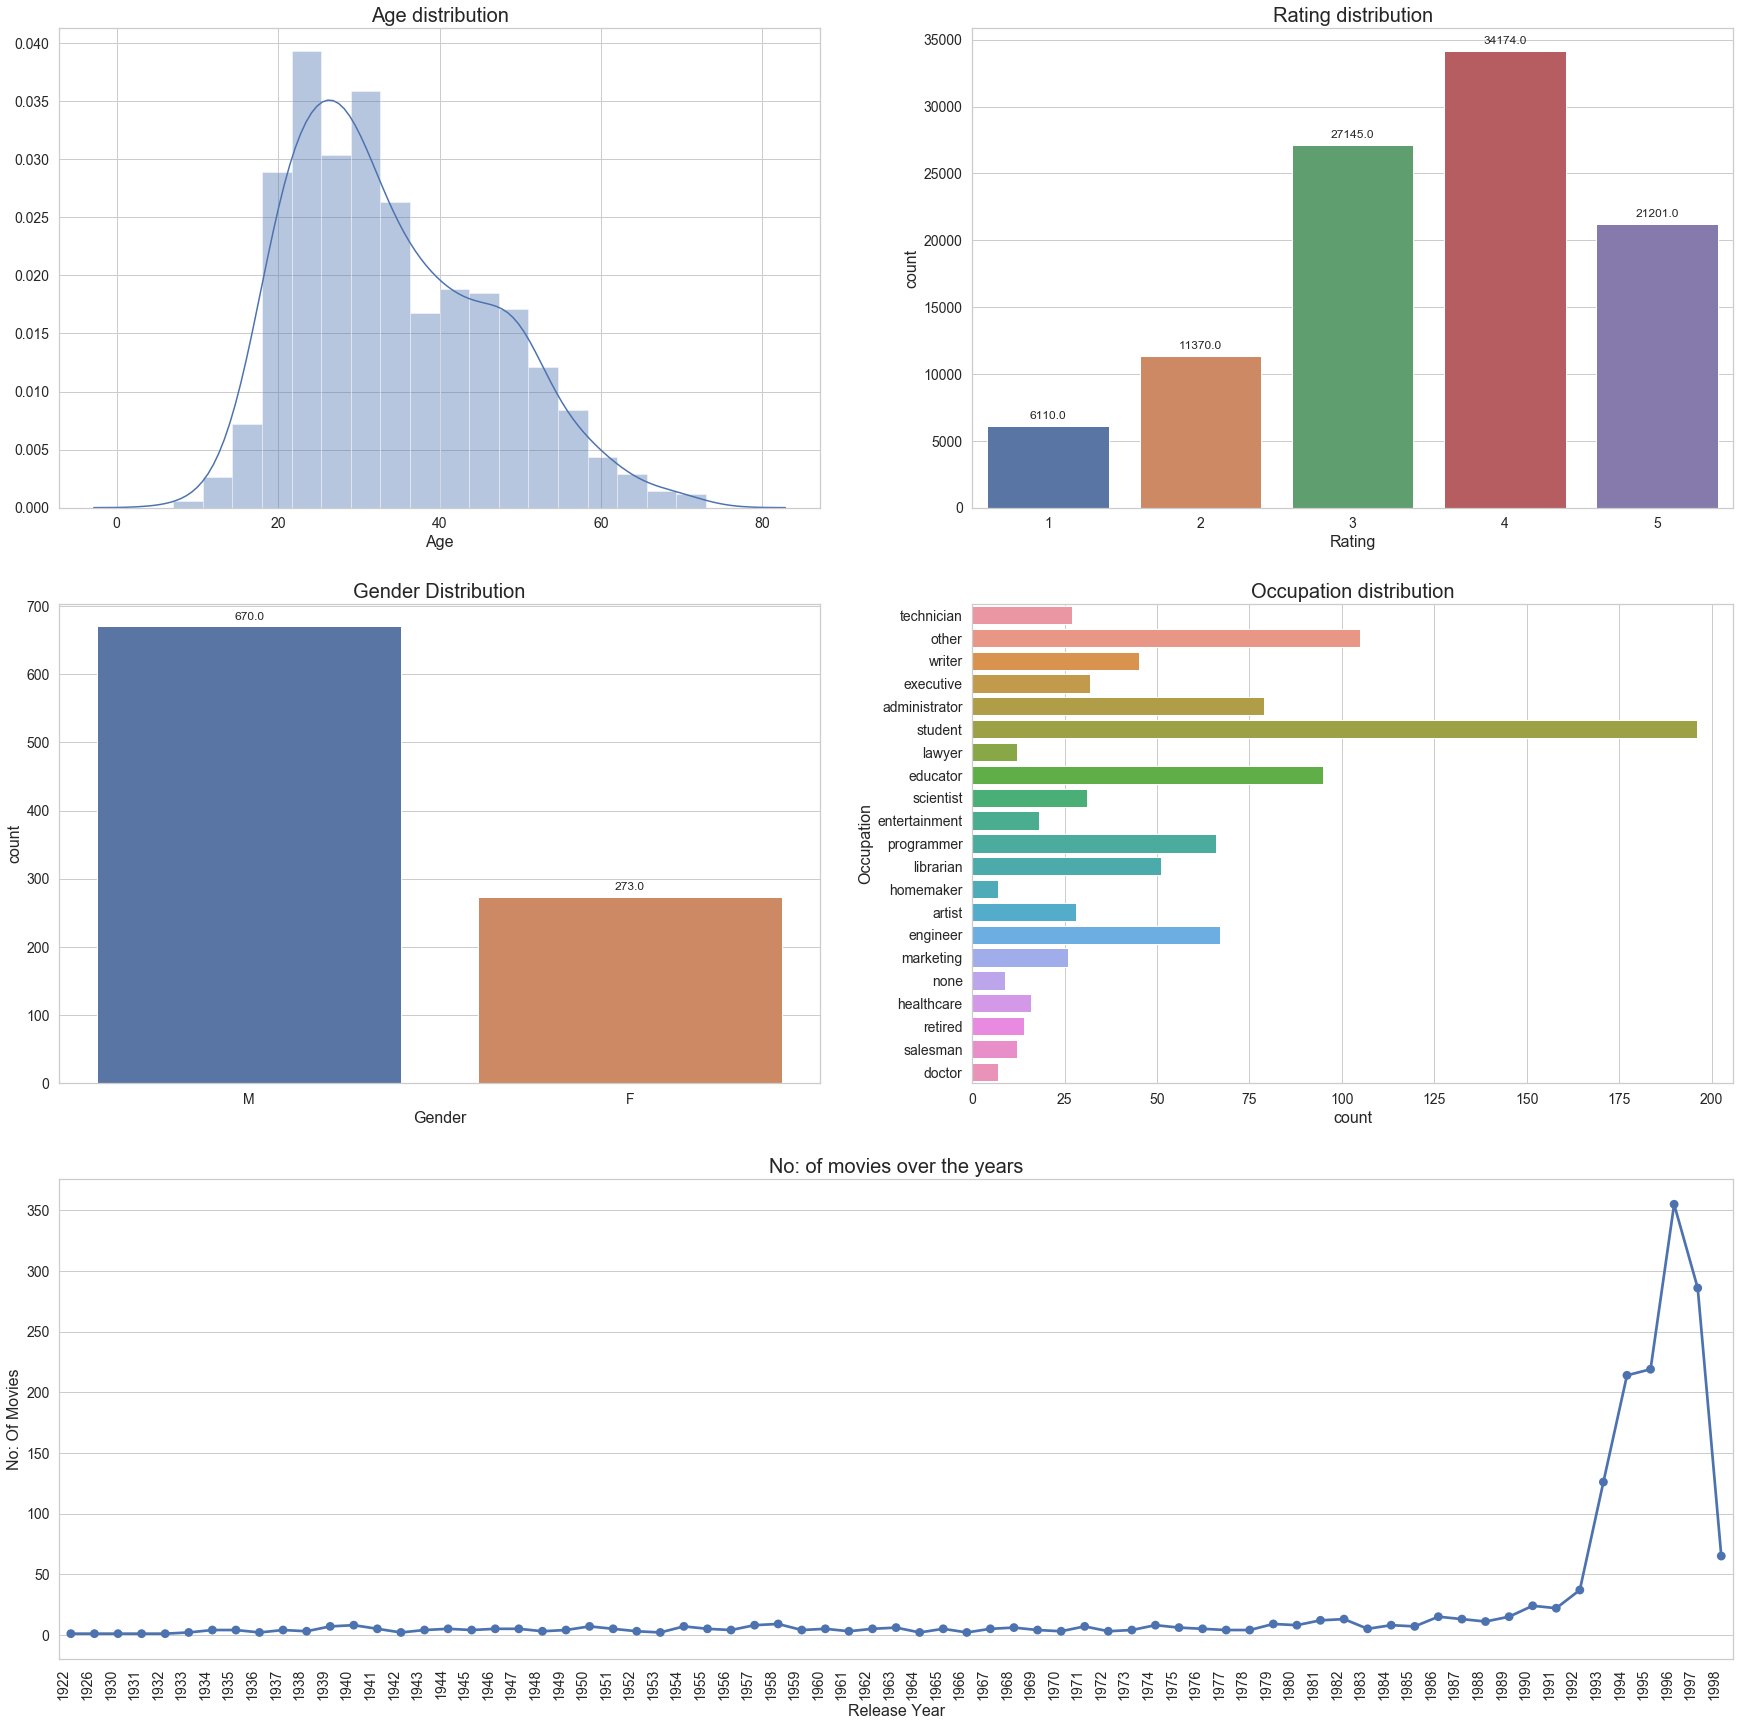

In [20]:
fig = plt.figure(figsize=(30, 30))
gs = fig.add_gridspec(3, 2)

fig_ax1 = fig.add_subplot(gs[0, 0])
sns.distplot(users['Age'], ax=fig_ax1)
fig_ax1.set_title('Age distribution')

fig_ax2 = fig.add_subplot(gs[0, 1])
p1=sns.countplot(ratings['Rating'], ax=fig_ax2)
for p in p1.patches:
    p1.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
fig_ax2.set_title('Rating distribution')

fig_ax3 = fig.add_subplot(gs[1, 0])
p2=sns.countplot(users['Gender'], ax=fig_ax3)
for p in p2.patches:
    p2.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
fig_ax3.set_title('Gender Distribution')

fig_ax4 = fig.add_subplot(gs[1, 1])
sns.countplot(y=users['Occupation'], ax=fig_ax4)
fig_ax4.set_title('Occupation distribution')

fig_ax5 = fig.add_subplot(gs[2, :])
movies_count = movies[['Movie Title', 'Release Year']].groupby(by='Release Year').count()
sns.pointplot(movies_count.index, movies_count['Movie Title'], ax=fig_ax5).set_xticklabels(movies_count.index, rotation=90, horizontalalignment='right')
fig_ax5.set_ylabel("No: Of Movies")
fig_ax5.set_title('No: of movies over the years')

In [21]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1681 entries, 1 to 1682
Data columns (total 25 columns):
Movie Title         1681 non-null object
Release Date        1681 non-null datetime64[ns]
IMDb URL            1679 non-null object
Action              1681 non-null int64
Adventure           1681 non-null int64
Animation           1681 non-null int64
Children's          1681 non-null int64
Comedy              1681 non-null int64
Crime               1681 non-null int64
Documentary         1681 non-null int64
Drama               1681 non-null int64
Fantasy             1681 non-null int64
Film-Noir           1681 non-null int64
Horror              1681 non-null int64
Musical             1681 non-null int64
Mystery             1681 non-null int64
Romance             1681 non-null int64
Sci-Fi              1681 non-null int64
Thriller            1681 non-null int64
War                 1681 non-null int64
Western             1681 non-null int64
Release Year        1681 non-null int64
Re

## Extracting the dataframe by Movie, Release Year and Genre
### Genre is stacked to enable grouping for visualization

In [22]:
# We create a copy of the current dataframe after resetting the index
genres_by_year = movies.reset_index()[['MovieId','Release Year', 'Animation', "Children's", 'Comedy', 'Action', 'Adventure',
       'Thriller', 'Drama', 'Crime', 'Sci-Fi', 'War', 'Romance', 'Horror','Musical', 'Documentary', 'Western', 
                         'Fantasy', 'Film-Noir','Mystery']].copy()

# Set the MovieID and Release Year as the index. This is to ensure 'stack' function works 
# against the MovieId + Release Year combination
genres_by_year.set_index(['MovieId', 'Release Year'],inplace=True)

# We stack the values which are '1'. This will fill the column values with the name of the column which has a value '1'
genres_by_year = genres_by_year[genres_by_year==1].stack().reset_index().drop(0,1)

# We rename the resulting column as 'Genre'
genres_by_year.rename(columns={'level_2':'Genre'}, inplace=True)

# We then group by the 'Release Year and Genre' on the MovieId and use the 'count' aggregator to get the 'no: of movies'
genres_by_year = genres_by_year.groupby(['Release Year', 'Genre'])['MovieId'].count().to_frame().reset_index()

# We then rename the count as 'No of Movies'
genres_by_year.rename(columns={'MovieId':'No of Movies'}, inplace=True)

## Visualize the popularity of Genres over the years
### Visualizing given a year, movies of which genre got released the most
A plot of the **Release Year** and **No of Movies** by **Genre** is shown below

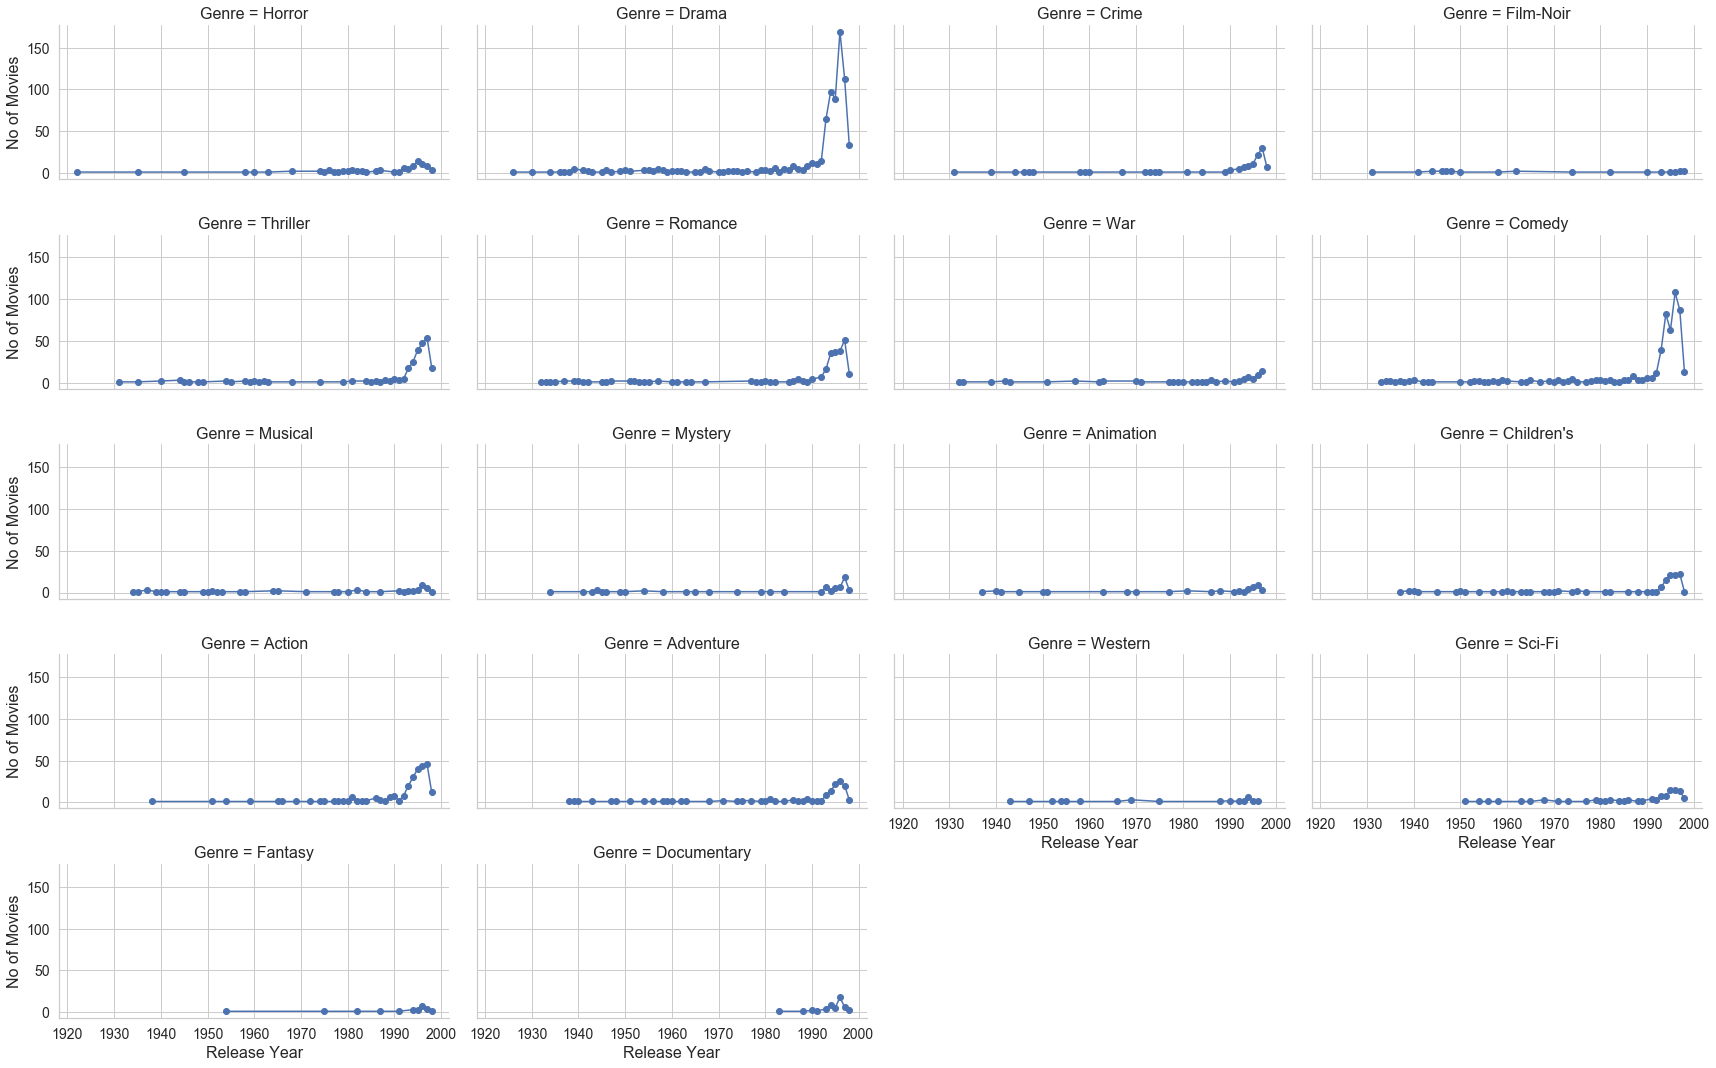

In [23]:
grid = sns.FacetGrid(genres_by_year, col='Genre', col_wrap=4, aspect=2)
grid.map(plt.plot, 'Release Year', 'No of Movies', marker='o')

## Display the top 25 movies by average rating
### Considering only the movies which received at least a 100 ratings
* We first take the **userratings_with_movies** dataframe and select the **MovieId**, **Movie Title** and **Rating** columns
* We then aggregate the columns 
    - **MovieId** is aggregated on **count** aggregator
    - **Rating** is aggregated on **mean** aggregator

Since the requirement is to find the movies which received atleast 100 ratings, we filter the dataframe where **Total Count** is greater than or equal to **100**
<br>
<br>
We then take the top **25** movies after sorting the **Average Rating** in the descending order

In [53]:
title_rating = userratings_with_movies[['MovieId','Movie Title','Rating']].groupby('Movie Title').agg({'MovieId':'count', 'Rating':'mean'}).rename(columns={'MovieId':'Total Count', 'Rating':'Average Rating'})
title_rating[title_rating['Total Count'] >= 100].sort_values(by=['Average Rating'], ascending=False).head(25)

,Total Count,Average Rating
Movie Title,,
"Close Shave, A (1995)",112,4.491071
Schindler's List (1993),298,4.466443
"Wrong Trousers, The (1993)",118,4.466102
Casablanca (1942),243,4.456790
"Shawshank Redemption, The (1994)",283,4.445230
Rear Window (1954),209,4.387560
"Usual Suspects, The (1995)",267,4.385768
Star Wars (1977),583,4.358491
12 Angry Men (1957),125,4.344000


Above is the top **25** list of Movies that recieved atleast **100 ratings**

### Analyzing Movies by Gender on 'Drama', 'Romance', 'Sci-Fi'
Select 'Gender', 'Drama', 'Romance', 'Sci-Fi' from **userratings_with_movies** and groupby **Gender**. We then aggregate all the required Genres by the **sum** aggregator

In [25]:
gender_by_category = userratings_with_movies[['Gender', 'Drama', 'Romance', 'Sci-Fi']]
gender_by_category_pcts = gender_by_category.groupby(['Gender']).agg({'Drama': 'sum', 'Romance': 'sum', 'Sci-Fi': 'sum'}).apply(lambda x: x * 100 / x.sum())
gender_by_category_pcts

,Drama,Romance,Sci-Fi
Gender,,,
F,27.591307,30.101228,20.652003
M,72.408693,69.898772,79.347997


The above output shows that 
* about **72%** of **Males** have seen **Drama** as compared to around **28%** of **Females** 
* about **70%** of **Males** have seen **Romance** as compared to around **30%** of **Females**
* about **79%** of **Males** have seen **Sci-Fi** as compared to around **21%** of **Females**

### Plotting the percentages of the 'Gender' from the dataframe

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a21461588>,
      dtype=object)

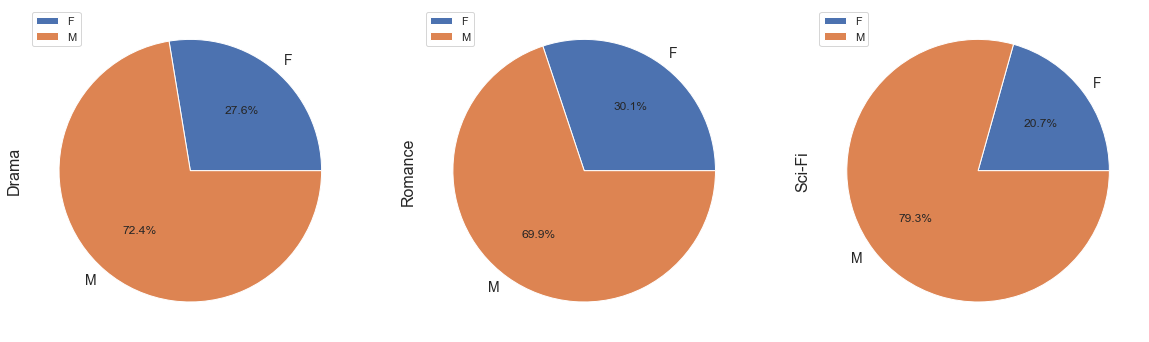

In [26]:
gender_by_category_pcts.plot.pie(subplots=True, figsize=(20, 15), autopct='%1.1f%%')

## Commenting on the validity of the following statements

### Men watch more drama than women

Men watch more 'Drama' as compared to women. % of Men is 72% as compared to 27.5% women

In [27]:
print(gender_by_category_pcts.loc['F']['Drama'], gender_by_category_pcts.loc['M']['Drama'])

27.59130674554433 72.40869325445567


### Men watch more Romance than women

Men watch more 'Romance' as compared to women. % of Men is 70% as compared to 30% women

In [28]:
print(gender_by_category_pcts.loc['F']['Romance'], gender_by_category_pcts.loc['M']['Romance'])

30.10122809722008 69.89877190277991


### Women watch more Sci-Fi than men

Men watch more 'Sci-Fi' as compared to women. % of Men is 79.3% as compared to 20.6% women

In [29]:
print(gender_by_category_pcts.loc['F']['Sci-Fi'], gender_by_category_pcts.loc['M']['Sci-Fi'])

20.65200314218382 79.34799685781618
